## **La Pneumonie**

#### **Qu'est ce que la pneumonie ?**

La pneumonie est une infection pulmonaire potentiellement grave, souvent causée par des bactéries, des virus ou des champignons. 

Elle se caractérise par une inflammation des sacs d'air dans les poumons, provoquant :  
- Fièvre
- Toux
- Essoufflement
- Douleur thoracique. 

#### **Comment le détecter en image ?**


Les radiographies pulmonaires montrent généralement des opacités. 

#### **Un traitement ?**

Le traitement implique des antibiotiques ou des antiviraux selon la cause, ainsi que des soins de soutien pour soulager les symptômes et favoriser la guérison.

![](https://diagnostics.labosalem.dz/wp-content/uploads/2021/01/pneumonie-schema-1024x827.jpeg)

#### Import des bibliothèques

In [1]:
# Visualisation des données
import matplotlib.pyplot as plt
#Amélioration de la visualisation des données
import seaborn as sns
#Construction de réseaux de neurones
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64 (2).dll
C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"

Bad key figure.labelsize in file C:\Users\valen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\mpl-data\stylelib\classic (2).mplstyle, line 310 ('figure.labelsize:   medium    # size of the figure l

In [2]:
# Apprentissage automatique, classification, régression.
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix

# Traitement d'images, vision par ordinateur.
import cv2

# Calculs numériques, tableaux, mathématiques.
import numpy as np

# Manipulation de données, analyse, tableaux.
import pandas as pd 

import os

## Déscription du dataset

*Le jeu de données est organisé en trois dossiers :*

- train
- test
- val

Lien du jeu de données : https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia/data

Il contient des sous-dossiers pour chaque catégorie d'images **Pneumonie** ou **Normal**. En tout, c'est plus de 5863 images de radiographies thoraciques au format JPEG, réparties en deux catégories, Pneumonie et Normal.

In [3]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_training_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype="object")

#### Charger le dataset

In [4]:
train = get_training_data('C:/Users/valen/Downloads/pneumonia_detection_app-main/input/chest_xray/chest_xray/train')
test = get_training_data('C:/Users/valen/Downloads/pneumonia_detection_app-main/input/chest_xray/chest_xray/test')
val = get_training_data('C:/Users/valen/Downloads/pneumonia_detection_app-main/input/chest_xray/chest_xray/val')

In [5]:
print(train.shape)
print(test.shape)
print(val.shape)

(5216, 2)
(624, 2)
(16, 2)


<AxesSubplot:xlabel='count'>

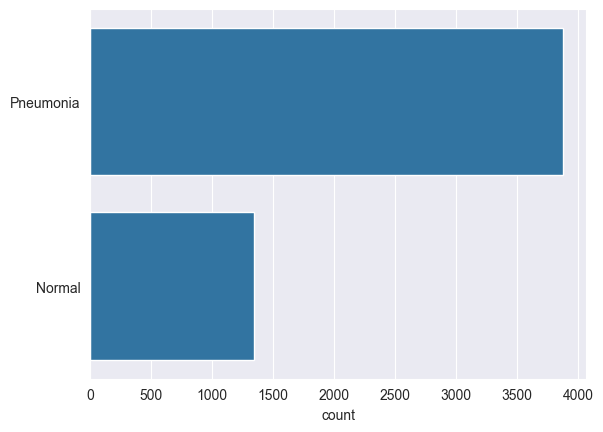

In [6]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'NORMAL')

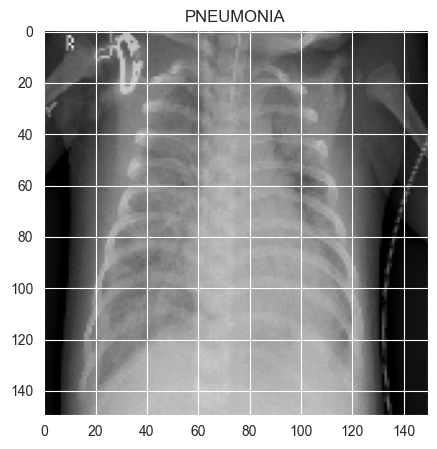

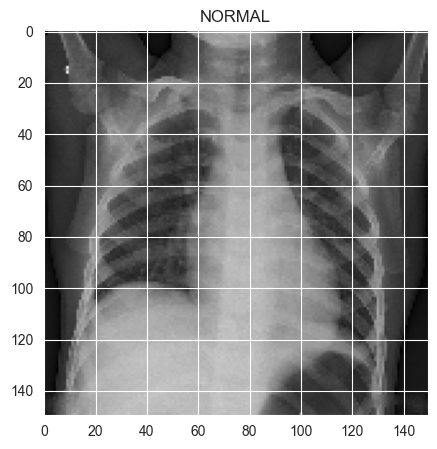

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title(labels[train[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title(labels[train[-1][1]])

In [8]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in test:
    x_test.append(feature)
    y_test.append(label)
    
for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

In [9]:
# Normalisation des données
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [10]:
# transformation pour deep learning
x_train = x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [11]:
# With data augmentation to prevent overfitting and handling the imbalance in dataset

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [12]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 75, 75, 64)       2

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

In [14]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = datagen.flow(x_val, y_val) ,callbacks = [learning_rate_reduction])

Epoch 1/12
163/163 [==============================] - 99s 598ms/step - loss: 0.6776 - accuracy: 0.8265 - val_loss: 49.1455 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 2/12
163/163 [==============================] - 97s 596ms/step - loss: 0.3067 - accuracy: 0.8898 - val_loss: 78.8485 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
163/163 [==============================] - ETA: 0s - loss: 0.2536 - accuracy: 0.9166
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
163/163 [==============================] - 98s 599ms/step - loss: 0.2536 - accuracy: 0.9166 - val_loss: 24.1613 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 4/12
163/163 [==============================] - 104s 635ms/step - loss: 0.1634 - accuracy: 0.9434 - val_loss: 3.2766 - val_accuracy: 0.6250 - lr: 3.0000e-04
Epoch 5/12
163/163 [==============================] - 98s 604ms/step - loss: 0.1554 - accuracy: 0.9509 - val_loss: 14.2315 - val_accuracy: 0.6250 - lr: 3.0000e-04
Epoch 6/12
163/163 [================

In [15]:
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

20/20 [==============================] - 3s 139ms/step - loss: 0.2882 - accuracy: 0.8990
Loss of the model is -  0.2881869971752167
20/20 [==============================] - 3s 141ms/step - loss: 0.2882 - accuracy: 0.8990
Accuracy of the model is -  89.90384340286255 %


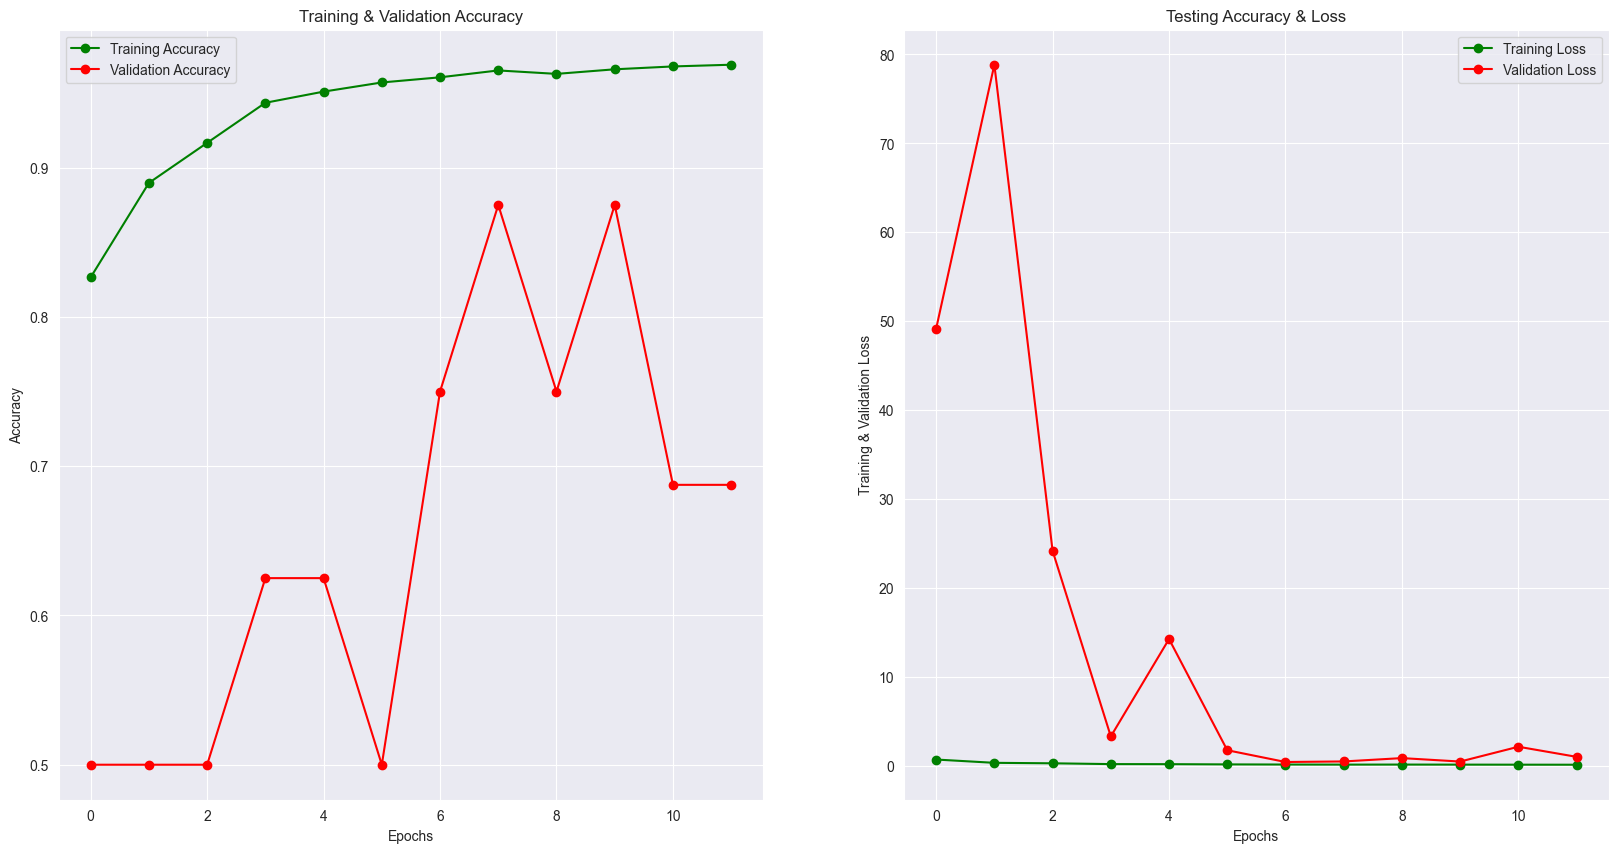

In [27]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [53]:
predictions = model.predict(x_test)
predictions = predictions > 0.5
# predictions = np.argmax(predictions, axis=1)
predictions[:15]
predictions_new = []
for val in predictions:
    if val == True:
        predictions_new.append(1)
    else:
        predictions_new.append(0)
predictions_new[:15]

20/20 [==============================] - 2s 99ms/step


[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [55]:
print(classification_report(y_test, predictions_new, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.95      0.88      0.92       390
   Normal (Class 1)       0.83      0.93      0.87       234

           accuracy                           0.90       624
          macro avg       0.89      0.90      0.89       624
       weighted avg       0.90      0.90      0.90       624



In [56]:
cm = confusion_matrix(y_test,predictions_new)
cm

array([[344,  46],
       [ 17, 217]], dtype=int64)

In [57]:
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])

<AxesSubplot:>

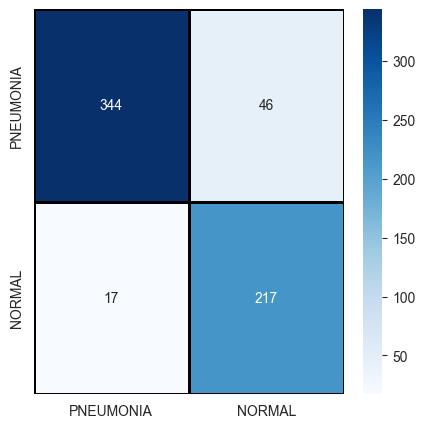

In [58]:
plt.figure(figsize = (5,5))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = labels,yticklabels = labels)

In [61]:
correct = np.nonzero(predictions_new == y_test)[0]
incorrect = np.nonzero(predictions_new != y_test)[0]

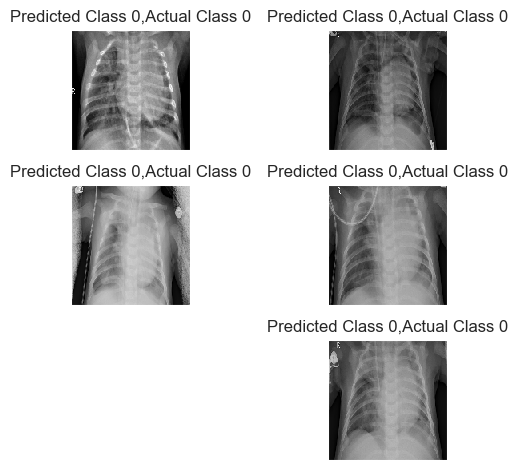

In [65]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions_new[c], y_test[c]))
    plt.tight_layout()
    i += 1

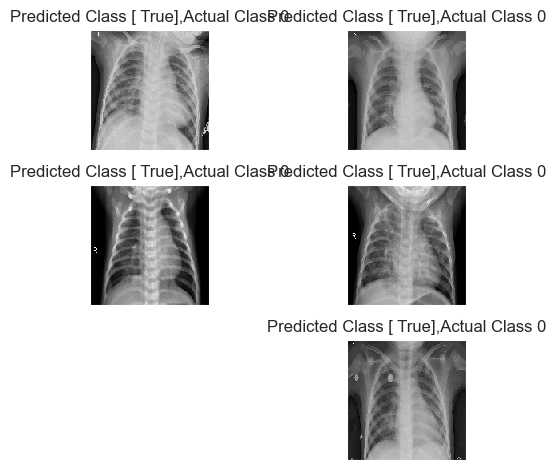

In [66]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="gray", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(predictions[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [36]:
# saving the model to use it in the web application
model.save('C:/Users/valen/Documents/EFREI M1/DataCamp/PneumoApp/models/trained_model_CNN_new.h5')